#### *Applied Mathematical Finance 2*

## <ins> *Seminar 1: Equity Forward* </ins>

### 1. Equity forward

Under the risk-neutral probability space $(\Omega, \mathcal F, \mathbb{P})$, where $(\mathcal{F}_t)_{t \geq 0}$ is the filtration generated my the market, $S_t$ is cadlag (right continuous with left limits) process adapted to $(\mathcal{F}_t)_{t \geq 0}$ and $S_{t-}$ is its left side limit at point $t$. 

We assume that the stock $S$ distributes a series of discrete dividends $(D_i)_{i \geq 1}$ with corresponding 

$\cdot$ anouncnmenet dates $(t_i^a)_{i \geq 1}$,

$\cdot$ ex dividend dates $(t_i^{ex})_{i \geq 1}$,

$\cdot$ payment dates $(t_i^p)_{i \geq 1}$.

Each discrete dividend $D_i$ incorporates the fixed dividend amount $\alpha_i$ and proportional dividend rate $\beta_i$. That is, we may assume that the dividend payment amount is an affine function of the stock price on the ex-dividend date (assume w.l.o.g. that the announcement date and ex-dividend date are identical), i.e. 

$$D_i = \alpha_i + \beta_i \cdot S_{t^{ex}_i -}.$$

Hence, by no arbitrage argument the stock price $S$ must jump on the ex-dividend date by the net present value of dividend amount. Assuming that an instanteneous risk free and repo rates are deterministic functions $r_t$ and $\mu_t$ correspondingly,  

$$
\begin{equation}
S_{t^{ex}_i} = S_{t^{ex}_i - } - e^{- \int_{t^{ex}_i}^{t^p_i} (r_s - \mu_s) ds} \cdot D_i.
\end{equation}
$$

Introducing the discount factor and repo factor curves $DF(t, T)$ and $RF(t, T)$, the formula $(1)$ can be rewritten as 

$$
S_{t^{ex}_i} = S_{t^{ex}_i - } - \frac{DF(t^{ex}_i, t^p_i)}{RF(t^{ex}_i, t^p_i)} \cdot D_i.
$$

Denoting by $\bar \alpha_i$ and $\bar \beta_i$ the present values of  $\alpha_i$ and $\beta_i$ at $t_i^{ex}$, we may write 

$$\bar \alpha_i := e^{- \int_{t^{ex}_i}^{t^p_i} (r_s - \mu_s) ds} \alpha_i \equiv \frac{DF(t^{ex}_i, t^p_i)}{RF(t^{ex}_i, t^p_i)} \alpha_i,$$

$$\bar \beta_i := e^{- \int_{t^{ex}_i}^{t^p_i} (r_s - \mu_s) ds} \beta_i \equiv \frac{DF(t^{ex}_i, t^p_i)}{RF(t^{ex}_i, t^p_i)} \beta_i,$$

$$
S_{t^{ex}_i} = (1 - \bar \beta_i )S_{t^{ex}_i - } - \bar \alpha_i.
$$

Finally, the T-forward value of the stock price at time $t$ is 

$$
F^T_t = R(t, T) (S_t - Div(t, T)), 
$$

where 

$$R(t, T) := \frac{RF(t, T)}{DF(t, T)} \cdot \prod_{ \{ i | t < t^{ex}_i \leq T \}} (1 - \bar \beta_i),$$
$$Div(t, T) := \sum_{\{ i | t < t^{ex}_i \leq T \}} \frac{\bar \alpha_i}{R(t, t^{ex}_i)}.$$   

In case of zero dividends, 

$$F_t^{T} = \dfrac{RF(t, T)}{DF(t, T)} \cdot S_t$$

Note that the $\alpha \to \bar \alpha$ and $\beta \to \bar \beta$ transformations are the carry rates from ex-dividend dates $t^{ex}_{i}$ to dividend payment dates $t^{p}_{i}$, whereas $R(t, t^{ex}_i)$ is the carry rate from the value date $t$ to ex-dividend date $t^{ex}_{i}$. Combining them all, we effectively obtain the carry rate from $t$ to $t^{p}_{i}$. So why do we factorize it into two steps?

### 2. Numerical example

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from typing import Callable, Any
import warnings
warnings.filterwarnings('ignore')

**2.1** Assume that on the market we observe the effective zero_rates rates $r^{zero}_t$ given by the following dates-to-rates mapping: 


| **date**| 1d | 1w | 1m | 3m | 6m | 1y | 2y | 3y | 4y | 5y | 6y | 7y | 8y | 9y | 10y |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$r^{zero}_t$, % | 16 | 16 | 15.5 | 15 | 14 | 13 | 12.5 | 12 | 11.5 | 11.25 | 11.1 | 11.05 | 11 | 10.95 | 10.93 |
| $\mu^{zero}_t$, %| 13 | 12 | 11 | 11 | 10.5 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 |


In [3]:
dates = np.array([0.048, 0.25, 1, 3, 6, 12, 24, 36, 48, 60, 72, 84, 96,  108, 120]) / 12 # Assume BUS252  convention, i.e. 252 days per year, 21 per month etc.
risk_free_rates = np.array([16, 16, 15.5, 15, 14, 13, 12.5, 12, 11.5, 11.25, 11.1, 11.05, 11, 10.95, 10.93]) / 100
repo_rates = np.array([10.5, 10.5, 10, 9.5, 8.5, 7.5, 7, 6.5, 6, 5.75, 5.6, 5.55, 5.45, 5.45, 5.4]) / 100

In [4]:
def discount_factors_on_pillar_dates(dates: np.ndarray, rates: np.ndarray):
    """
    Returns discount factors for pillar dates. 

    Args: 
        dates: dates at which the discount factors are computed. 
        rates: zero-rates from which the discount factors are transformed. 
    """
    return np.exp(- dates * rates) # Assume continous compounding convention. 

In [5]:
risk_free_dfs = discount_factors_on_pillar_dates(dates=dates, rates=risk_free_rates)
repo_dfs = discount_factors_on_pillar_dates(dates=dates, rates=repo_rates)

In [6]:
def build_dicount_factor_curve_based_on_pillar_discount_factors(dates: np.ndarray, discount_factors: np.ndarray):
    """
    Build discount factor curve based on pillar discount factors. Linear interpolation in \log(DF(t, T)) wrt T assumed. 

    Args: 
        dates: dates at which the discount factors are given. 
        discount: the discount factors to interpolate. 
    """
    log_discount_factors = np.log(discount_factors)
    intepolator = interp1d(x=dates, y=log_discount_factors, kind="linear", fill_value="extrapolate")
    return lambda x: np.exp(intepolator(x))


In [7]:
risk_free_dfs_curve = build_dicount_factor_curve_based_on_pillar_discount_factors(dates=dates, discount_factors=risk_free_dfs)
repo_dfs_curve = build_dicount_factor_curve_based_on_pillar_discount_factors(dates=dates, discount_factors=repo_dfs)

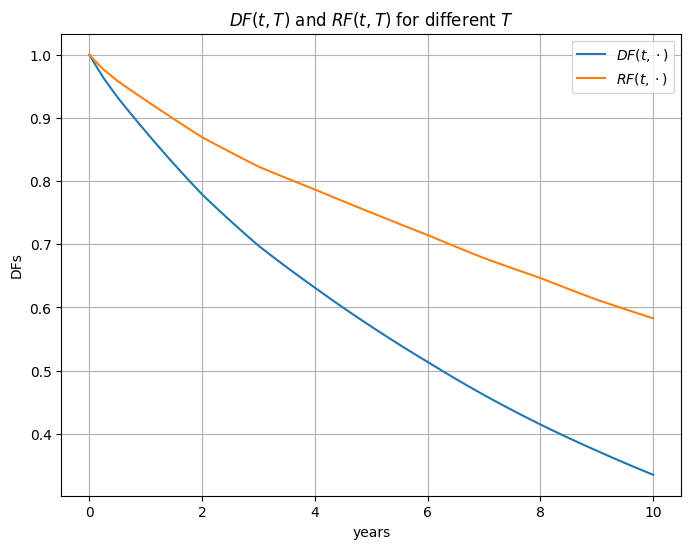

In [8]:
T = 10; t = 0
time_greed = np.linspace(t, T, int(T * 12))

plt.figure(figsize=(8, 6))
plt.title("$DF(t, T)$ and $RF(t, T)$ for different $T$".format(T, t))
plt.plot(time_greed, risk_free_dfs_curve(time_greed), label="$DF(t, \cdot)$")
plt.plot(time_greed, repo_dfs_curve(time_greed), label="$RF(t, \cdot)$")
plt.xlabel("years")
plt.ylabel("DFs")
plt.grid()
plt.legend()
plt.show()

**2.2** Now, assume that the dividends schedule is given by the following table:

|$t_{ex}$| 6m | 1y | 1y6m | 2y | 2y6m | 3y | 3y6m | 4y | 4y6m | 5y | 5y6m | 6y | 6y7m | 7y |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$t_{p}$| 6m1w | 1y1w | 1y6m1w | 2y1w | 2y6m1w | 3y1w | 3y6m1w | 4y1w | 4y6m1w | 5y1w | 5y6m1w | 6y1w | 6y7m1w | 7y1w |
| $\alpha_t$| 2 | 1.75 | 1.5 | 1.25 | 1 | 1 | 0.5 | 0.5 | 0.25 | 0 | 0 | 0 | 0 | 0 |
| $\beta_t$, %| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1.5 | 1.5 | 2.5 | 2 | 2 | 2 |



In [9]:
S_ref = 100
t_ex = np.array([6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84]) / 12 # ex-dividend dates
t_p = t_ex + 21 / 252 / 4  # each payment date is 1w after the ex-dividend date
alphas = np.array([2, 1.75, 1.5, 1.25, 1, 1, 0.5, 0.5, 0.25, 0, 0, 0, 0, 0]) # fixed dividends
betas = np.array([0, 0, 0, 0, 0, 0, 0, 0.01, 0.015, 0.015, 0.025, 0.02, 0.02, 0.02]) # proportional dividends

In [10]:
def get_discounted_dividends(alphas: np.ndarray, betas: np.ndarray, t_ex: np.ndarray, t_p: np.ndarray, 
                             risk_free_dfs_curve: Callable[[float], float], repo_dfs_curve: Callable[[float], float]):
    """
    Calculates the discounted dividends $\bar alpha_t$, $\bar \beta_t$, i.e. effectively discounts 
    the dividends from payment dates to ex-dividend dates. 

    Args:
        alphas: fixed dividends. 
        betas: proportional dividends. 
        t_ex: ex-dividend dates. 
        t_p: payment dates.
        risk_free_dfs_curve: the risk-free rate discount factor curve.
        repo_dfs_curve: the repo-rate discount factor curve. 
    """
    alphas_disc = np.zeros_like(alphas)
    betas_disc = np.zeros_like(betas)
    
    for i, (t_ex_i, t_p_i) in enumerate(zip(t_ex, t_p)):
        carry_rate = (risk_free_dfs_curve(t_p_i) /  risk_free_dfs_curve(t_ex_i)) / (repo_dfs_curve(t_p_i) /  repo_dfs_curve(t_ex_i))
        alphas_disc[i] = alphas[i] * carry_rate
        betas_disc[i] = betas[i] *  carry_rate

    return alphas_disc, betas_disc

In [11]:
alphas_disc, betas_disc = get_discounted_dividends(alphas=alphas, betas=betas, t_ex=t_ex, t_p=t_p, 
                                                   risk_free_dfs_curve=risk_free_dfs_curve, 
                                                   repo_dfs_curve=repo_dfs_curve)

In [12]:
def effective_carry_rate(t_ex: np.ndarray, betas_disc: np.ndarray, 
                         risk_free_dfs_curve: Callable[[float], float], 
                         repo_dfs_curve: Callable[[float], float]): 
    """
    Calculates the effective carry rate R(t, T). 

    Args: 
        t_ex: ex-dividend dates. 
        betas_disc: discounted from t_p to t_ex proportional dividends.
        risk_free_dfs_curve: the risk-free rate discount factor curve.
        repo_dfs_curve: the repo-rate discount factor curve.
    """
    betas_disc_complement = 1 - betas_disc
    return lambda t, T : (repo_dfs_curve(T) / repo_dfs_curve(t)) / (risk_free_dfs_curve(T) / risk_free_dfs_curve(t)) * np.prod(betas_disc_complement[(t < t_ex) &  (t_ex <= T)])

In [13]:
R = effective_carry_rate(t_ex=t_ex, betas_disc=betas_disc, 
                         risk_free_dfs_curve=risk_free_dfs_curve, 
                         repo_dfs_curve=repo_dfs_curve)

In [14]:
def cash_divs_present_value(t_ex: np.ndarray, alphas_disc: np.ndarray, R: Callable[[float, float], float]): 
    """
    Calculates the present value of cash dividends Div(t, T). 

    Args: 
        t_ex: ex-dividend dates. 
        alphas_disc: discounted from t_p to t_ex fixed dividends.
        R: carry rate. 
    """
    return lambda t, T: np.sum((alphas_disc / R(t, t_ex))[(t < t_ex) & (t_ex <= T)])

In [15]:
Div = cash_divs_present_value(t_ex=t_ex, alphas_disc=alphas_disc, R=R)

In [16]:
def equity_forward(S_ref: float, Div: Callable[[float, float], float], R: Callable[[float, float], float]):
    """
    Calculates the equity forward F(t, T).  

    Args: 
        S_ref: spot value. 
        Div: present value of cash dividends. 
        R: carry rate. 
    """
    return np.vectorize(lambda t, T: R(t, T) * (S_ref - Div(t, T)))


In [17]:
equity_forward_curve = equity_forward(S_ref=S_ref, Div=Div, R=R)

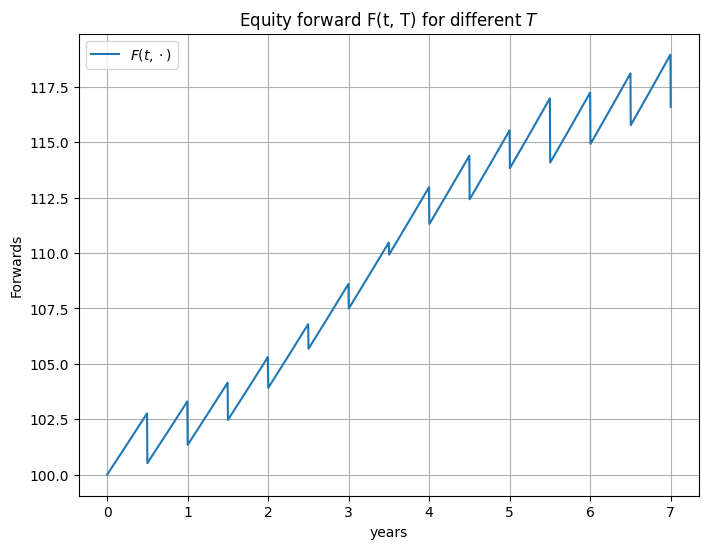

In [18]:
T = 7; t = 0
time_greed = np.linspace(t, T, int(T * 12 * 21))

plt.figure(figsize=(8, 6))
plt.title("Equity forward F(t, T) for different $T$")
plt.plot(time_greed, equity_forward_curve(t, time_greed), label="$F(t, \cdot)$")
plt.xlabel("years")
plt.ylabel("Forwards")
plt.grid()
plt.legend()
plt.show()

**2.3** Effect of bumping the carry rates $(r - \mu)_t$

In [19]:
risk_free_rates_100bp = risk_free_rates + 0.01
risk_free_dfs_100bp = discount_factors_on_pillar_dates(dates=dates, rates=risk_free_rates_100bp)
risk_free_dfs_curve_100bp = build_dicount_factor_curve_based_on_pillar_discount_factors(dates=dates, discount_factors=risk_free_dfs_100bp)
alphas_disc_rfr_100bp, betas_disc_rfr_100bp = get_discounted_dividends(alphas=alphas, betas=betas, t_ex=t_ex, t_p=t_p, 
                                                                       risk_free_dfs_curve=risk_free_dfs_curve_100bp, 
                                                                       repo_dfs_curve=repo_dfs_curve)
R_rfr_100bp = effective_carry_rate(t_ex=t_ex, betas_disc=betas_disc_rfr_100bp, 
                                   risk_free_dfs_curve=risk_free_dfs_curve_100bp, 
                                   repo_dfs_curve=repo_dfs_curve)
Div_rfr_100bp = cash_divs_present_value(t_ex=t_ex, alphas_disc=alphas_disc_rfr_100bp, R=R_rfr_100bp)
equity_forward_curve_rfr_100bp = equity_forward(S_ref=S_ref, Div=Div_rfr_100bp, R=R_rfr_100bp)

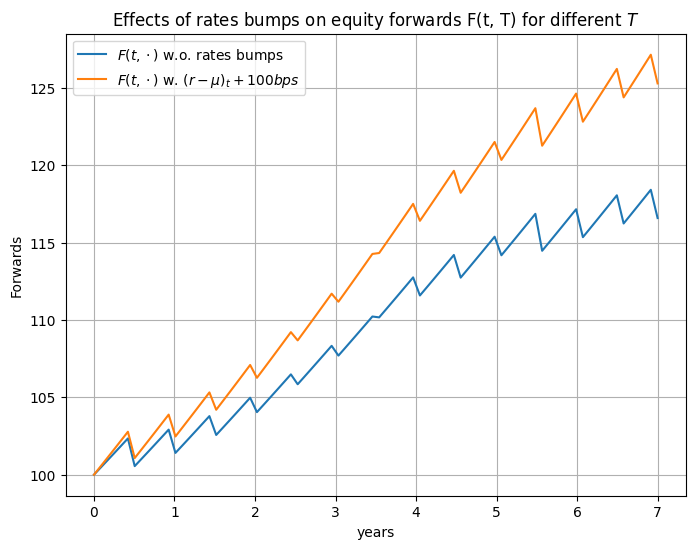

In [20]:
T = 7; t = 0
time_greed = np.linspace(t, T, int(T * 12))

plt.figure(figsize=(8, 6))
plt.title("Effects of rates bumps on equity forwards F(t, T) for different $T$")
plt.plot(time_greed, equity_forward_curve(t, time_greed), label="$F(t, \cdot)$ w.o. rates bumps")
plt.plot(time_greed, equity_forward_curve_rfr_100bp(t, time_greed), label="$F(t, \cdot)$ w. $(r - \mu)_t + 100bps$")
plt.xlabel("years")
plt.ylabel("Forwards")
plt.grid()
plt.legend()
plt.show()

**2.4** Effect of scaling the dividends $\alpha_t, \beta_t$

In [21]:
alphas_150 = alphas * 1.5
betas_150 = betas * 1.5

alphas_050 = alphas * 0.5
betas_050 = betas * 0.5

alphas_disc_150, betas_disc_150 = get_discounted_dividends(alphas=alphas, betas=betas_150, t_ex=t_ex, t_p=t_p, 
                                                           risk_free_dfs_curve=risk_free_dfs_curve, 
                                                           repo_dfs_curve=repo_dfs_curve)
alphas_disc_050, betas_disc_050 = get_discounted_dividends(alphas=alphas, betas=betas_050, t_ex=t_ex, t_p=t_p, 
                                                                       risk_free_dfs_curve=risk_free_dfs_curve, 
                                                                       repo_dfs_curve=repo_dfs_curve)

R_alpha_beta_150 = effective_carry_rate(t_ex=t_ex, betas_disc=betas_disc_150, 
                                        risk_free_dfs_curve=risk_free_dfs_curve, 
                                        repo_dfs_curve=repo_dfs_curve)

R_alpha_beta_050 = effective_carry_rate(t_ex=t_ex, betas_disc=betas_disc_050, 
                                        risk_free_dfs_curve=risk_free_dfs_curve, 
                                        repo_dfs_curve=repo_dfs_curve)

Div_alpha_beta_150 = cash_divs_present_value(t_ex=t_ex, alphas_disc=alphas_disc_150, R=R_alpha_beta_150)
Div_alpha_beta_050 = cash_divs_present_value(t_ex=t_ex, alphas_disc=alphas_disc_050, R=R_alpha_beta_050)
Div_alpha_beta_050_150 = cash_divs_present_value(t_ex=t_ex, alphas_disc=alphas_disc_050, R=R_alpha_beta_150)
Div_alpha_beta_150_050 = cash_divs_present_value(t_ex=t_ex, alphas_disc=alphas_disc_150, R=R_alpha_beta_050)

equity_forward_curve_alphas_betas_150 = equity_forward(S_ref=S_ref, Div=Div_alpha_beta_150, R=R_alpha_beta_150)
equity_forward_curve_alphas_betas_050 = equity_forward(S_ref=S_ref, Div=Div_alpha_beta_050, R=R_alpha_beta_050)
equity_forward_curve_alphas_betas_050_150 = equity_forward(S_ref=S_ref, Div=Div_alpha_beta_050, R=R_alpha_beta_150)
equity_forward_curve_alphas_betas_150_050 = equity_forward(S_ref=S_ref, Div=Div_alpha_beta_150, R=R_alpha_beta_050)

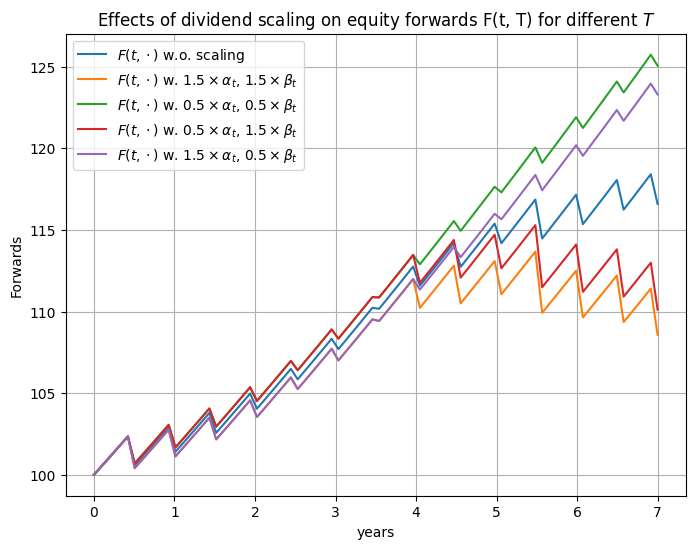

In [22]:
T = 7; t = 0
time_greed = np.linspace(t, T, int(T * 12))

plt.figure(figsize=(8, 6))
plt.title("Effects of dividend scaling on equity forwards F(t, T) for different $T$")
plt.plot(time_greed, equity_forward_curve(t, time_greed), label="$F(t, \cdot)$ w.o. scaling")
plt.plot(time_greed, equity_forward_curve_alphas_betas_150(t, time_greed), label="$F(t, \cdot)$ w. $1.5 \\times \\alpha_t$, $1.5 \\times \\beta_t$")
plt.plot(time_greed, equity_forward_curve_alphas_betas_050(t, time_greed), label="$F(t, \cdot)$ w. $0.5 \\times \\alpha_t$, $0.5 \\times \\beta_t$")
plt.plot(time_greed, equity_forward_curve_alphas_betas_050_150(t, time_greed), label="$F(t, \cdot)$ w. $0.5 \\times \\alpha_t$, $1.5 \\times \\beta_t$")
plt.plot(time_greed, equity_forward_curve_alphas_betas_150_050(t, time_greed), label="$F(t, \cdot)$ w. $1.5 \\times \\alpha_t$, $0.5 \\times \\beta_t$")
plt.xlabel("years")
plt.ylabel("Forwards")
plt.grid()
plt.legend()
plt.show()

### References

1. Buehler, Hans, Volatility and Dividends - Volatility Modelling with Cash Dividends and Simple Credit Risk (February 2, 2010).